# Introduction to Auto Encoders
Auto Encoders is a semi supervised deep learning technique that is used in data compression(using dimensionality reduction) and data denoising, where, where the real input acts as both the input and the target, and a neural network is trained to learn the underlying weights, that regenerate the original data from the data which has less dimensions. It has two parts or phases, Encoder and Decoder. The Hidden layers learns the mapping how the low dimensional data is mapped to a higher dimension.

<img src="encoder_decoder.png" width="800" height="400">

* Encoder, which encodes the original data, to the compressed data.
* Decoder, which decodes the compressed data, to the original data.

# Problem statement
Design a simple deep neural network architecture, compress mnist dataset digit images to lower dimensions and regenerate the original image. At first, a simple single layer network would be trained, and then, compared using a deeper architectures.

# Libraries used
* Keras - Model Building
* Numpy - Math Library
* Tensorflow - Model Building
* Matplotlib - Ploting

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Dense, Input
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset and its Preprocessing

In [2]:
(X_train,_),(X_test,_)=mnist.load_data()

In [3]:
X_train=X_train.astype('float32')/255. 
X_test=X_test.astype('float32')/255.

In [4]:
print("Shape of Training Dataset: ",X_train.shape)
print("Shape of Test Dataset: ",X_test.shape)

Shape of Training Dataset:  (60000, 28, 28)
Shape of Test Dataset:  (10000, 28, 28)


In [5]:
X_train=X_train.reshape((len(X_train),784))
X_test=X_test.reshape((len(X_test),784))

# Single Layered NN

## Training

In [6]:
encoding_dims=32
input_img=Input(shape=(784,))
encoded=Dense(encoding_dims,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)
auto_encoder=Model(input_img,decoded)
encoder=Model(input_img, encoded)

encoded_input=Input(shape=(encoding_dims,))
decoder_layer=auto_encoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [7]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
EPOCHS=50

In [9]:
history=auto_encoder.fit(X_train, X_train, epochs=EPOCHS,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
231/235 [============================>.] - ETA: 0s - loss: 0.2808WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017EEB2D3AE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

## Evaluation

In [10]:
def plot(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    plt.figure(figsize=(8,8))
    plt.plot(range(EPOCHS),loss,label='Training Loss')
    plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
    plt.legend()
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.show()

The Smoothness, and the degradation shows that the learning converges with a minimum error

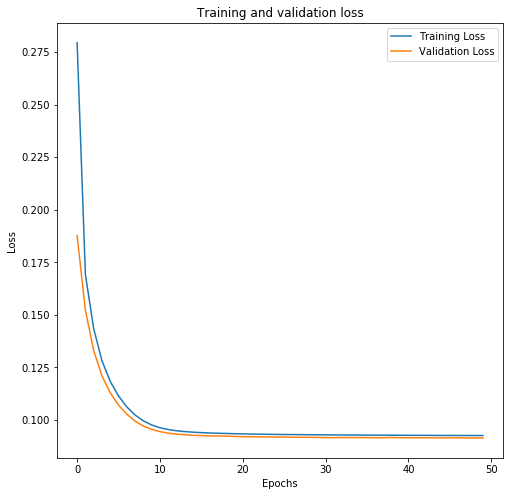

In [11]:
plot(history)

The Top Half has the original images while the bottom half has the reproduced images from the encoded images

In [12]:
def display(encoder, decoder, X):
    encoded_imgs=encoder.predict(X)
    decoded_imgs=decoder.predict(encoded_imgs)
    sample_size=10
    plt.figure(figsize=(20,4))
    for i in range(sample_size):
        ax=plt.subplot(2,sample_size,i+1)
        plt.imshow(X[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax=plt.subplot(2,sample_size,i+1+sample_size)
        plt.imshow(decoded_imgs[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

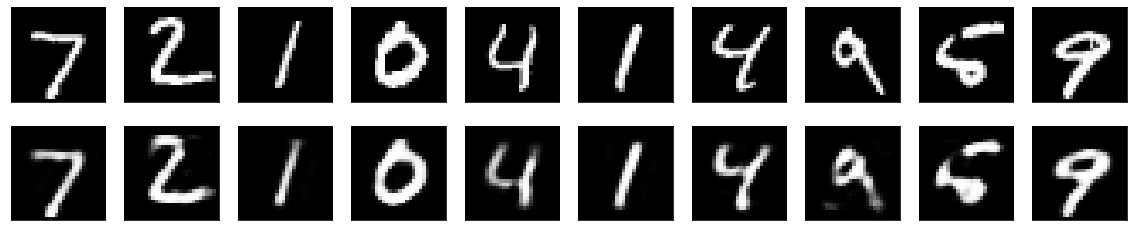

In [13]:
display(encoder,decoder,X_test)

Next, to improve the performance of the network, we use a deeper network, which has more learning capability compared to single hidden layer architecture

# Deep Auto Encoder

## Training

In [14]:
EPOCHS=100

In [15]:
input_img=Input((784,))
encoded=Dense(128,activation='relu')(input_img)
encoded=Dense(64,activation='relu')(encoded)
encoded=Dense(32,activation='relu')(encoded)
decoded=Dense(64,activation='relu')(encoded)
decoded=Dense(128,activation='relu')(encoded)
decoded=Dense(784,activation='relu')(decoded)
auto_encoder=Model(input_img,decoded)
auto_encoder.compile(optimizer='adam',loss='binary_crossentropy')
history=auto_encoder.fit(X_train, X_train, epochs=EPOCHS,batch_size=128,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
463/469 [============================>.] - ETA: 0s - loss: 0.3979WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017EF17447B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

469/469 [==============================] - 4s 8ms/step - loss: 0.2165 - val_loss: 0.2099
Epoch 63/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2177 - val_loss: 0.2235
Epoch 64/100
469/469 [==============================] - 7s 16ms/step - loss: 0.2218 - val_loss: 0.2166
Epoch 65/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2280 - val_loss: 0.2339
Epoch 66/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2224 - val_loss: 0.2144
Epoch 67/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2164 - val_loss: 0.2146
Epoch 68/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2295 - val_loss: 0.2230
Epoch 69/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2367 - val_loss: 0.2219
Epoch 70/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2204 - val_loss: 0.2365
Epoch 71/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2187 - val_

## Evaluation

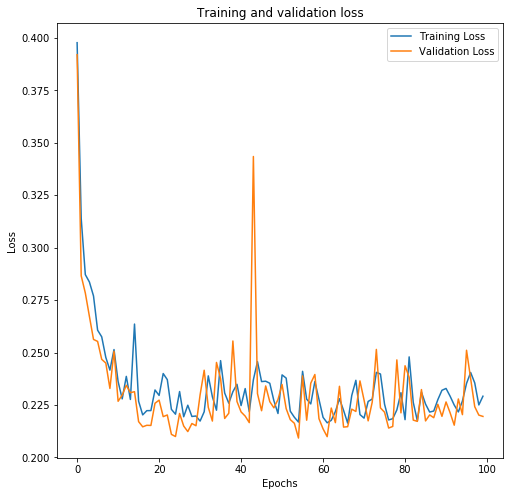

In [16]:
plot(history)

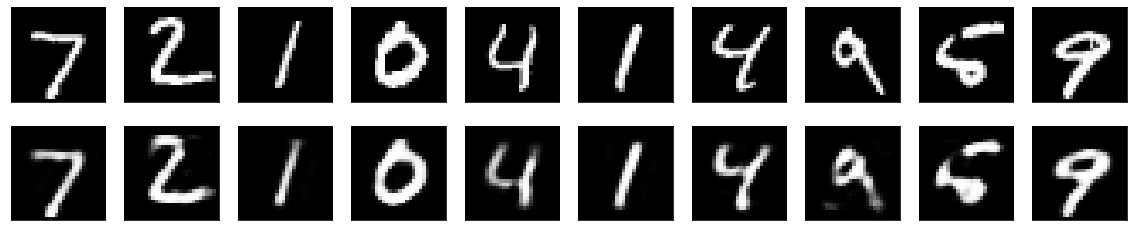

In [17]:
display(encoder,decoder,X_test)

# Data Denoising Application

## Adding noise to the data

In [18]:
factor=0.5
X_train_noisy= X_train + factor * np.random.normal(loc=0.0, scale=1.0,size=X_train.shape)
X_test_noisy= X_test + factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy=np.clip(X_train_noisy, 0.,1.)
X_test_noisy=np.clip(X_test_noisy, 0.,1.)

## Single Layer NN

## Training

In [19]:
encoding_dims=32
input_img=Input(shape=(784,))
encoded=Dense(encoding_dims,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)
auto_encoder=Model(input_img,decoded)
encoder=Model(input_img, encoded)
encoded_input=Input(shape=(encoding_dims,))
decoder_layer=auto_encoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
EPOCHS=50
history=auto_encoder.fit(X_train_noisy, X_train_noisy, epochs=EPOCHS,batch_size=128,shuffle=True,validation_data=(X_test_noisy,X_test_noisy))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
467/469 [============================>.] - ETA: 0s - loss: 0.5518- ETA: 0s -WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017EF18C4C80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and at

## Evaluation

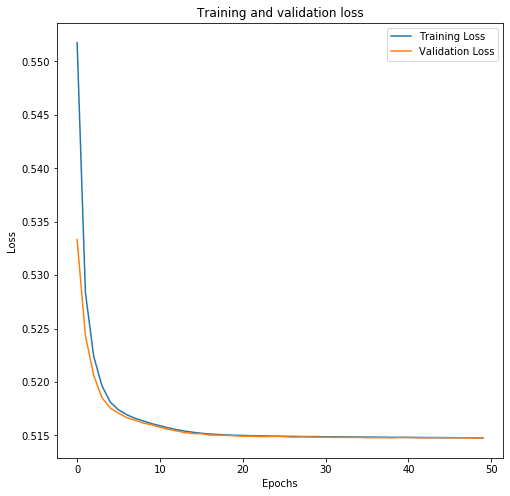

In [20]:
plot(history)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

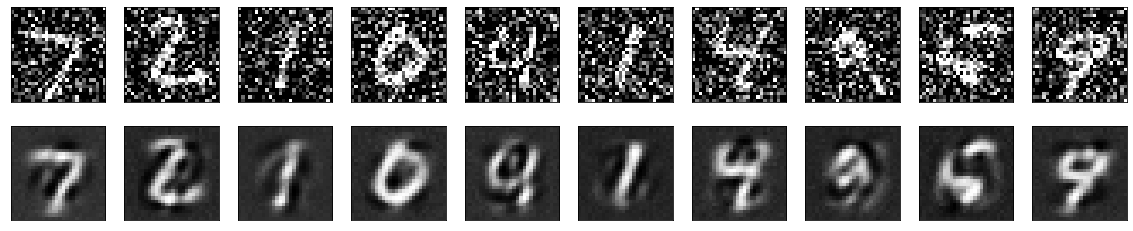

In [21]:
display(encoder,decoder, X_test_noisy)

## Deep AutoEncoders

## Training

In [22]:
EPOCHS=100
input_img=Input((784,))
encoded=Dense(128,activation='relu')(input_img)
encoded=Dense(64,activation='relu')(encoded)
encoded=Dense(32,activation='relu')(encoded)
decoded=Dense(64,activation='relu')(encoded)
decoded=Dense(128,activation='relu')(encoded)
decoded=Dense(784,activation='relu')(decoded)
auto_encoder=Model(input_img,decoded)
auto_encoder.compile(optimizer='adam',loss='binary_crossentropy')
history=auto_encoder.fit(X_train_noisy, X_train_noisy, epochs=EPOCHS,batch_size=128,shuffle=True,validation_data=(X_test_noisy,X_test_noisy))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
466/469 [============================>.] - ETA: 0s - loss: 0.8052WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017E8D358730> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

469/469 [==============================] - 4s 8ms/step - loss: 0.5558 - val_loss: 0.5488
Epoch 63/100
469/469 [==============================] - 9s 18ms/step - loss: 0.5469 - val_loss: 0.5451
Epoch 64/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5452 - val_loss: 0.5431
Epoch 65/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5426 - val_loss: 0.5415
Epoch 66/100
469/469 [==============================] - 8s 17ms/step - loss: 0.5421 - val_loss: 0.5410
Epoch 67/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5418 - val_loss: 0.5430
Epoch 68/100
469/469 [==============================] - 7s 14ms/step - loss: 0.5443 - val_loss: 0.5409
Epoch 69/100
469/469 [==============================] - 6s 13ms/step - loss: 0.5473 - val_loss: 0.5439
Epoch 70/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5494 - val_loss: 0.5437
Epoch 71/100
469/469 [==============================] - 9s 19ms/step - loss: 0.5443 - val_l

## Evaluation

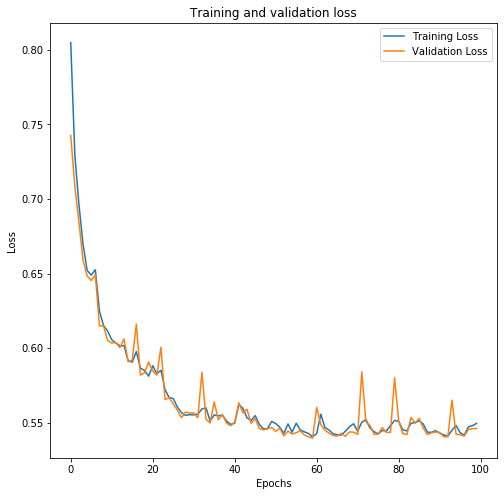

In [23]:
plot(history)

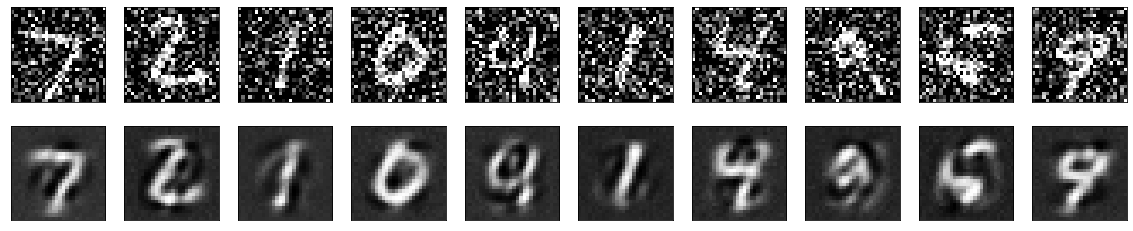

In [25]:
display(encoder,decoder, X_test_noisy)

# Limitations

* They are domain specific, hence trained on one domain, can only be applied on that domain itself.
* There are much better algorithms for image reconstruction, which offers a better performance